## Waste management using CNN mode

In [1]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------- ----------------------------- 10.0/39.5 MB 51.6 MB/s eta 0:00:01
   ----------------------- ---------------- 23.6/39.5 MB 59.7 MB/s eta 0:00:01
   ------------------------------------- -- 37.5/39.5 MB 62.7 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 53.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# pip install tensorflow

In [7]:
pip install numpy pandas matplot tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path ="dataset/TRAIN"
test_path ="dataset/TEST"

In [7]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [11]:
pip install cvt 


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
    data = pd.DataFrame({'image':x_data,'label':y_data})    

100%|██████████| 9999/9999 [00:50<00:00, 199.37it/s] 


In [9]:
data.shape

(22564, 2)

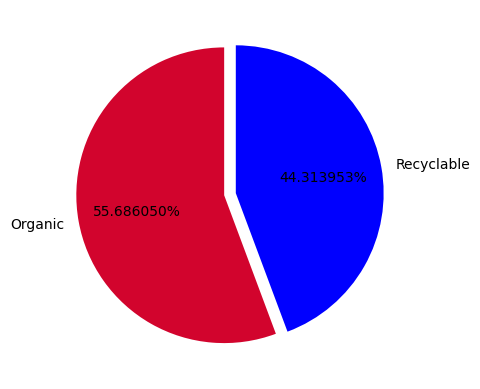

In [10]:
colors = ['#D2042D','#0000FF']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'],autopct='%1f%%',colors = colors, startangle = 90, explode=[0.04,0.04])
plt.show()

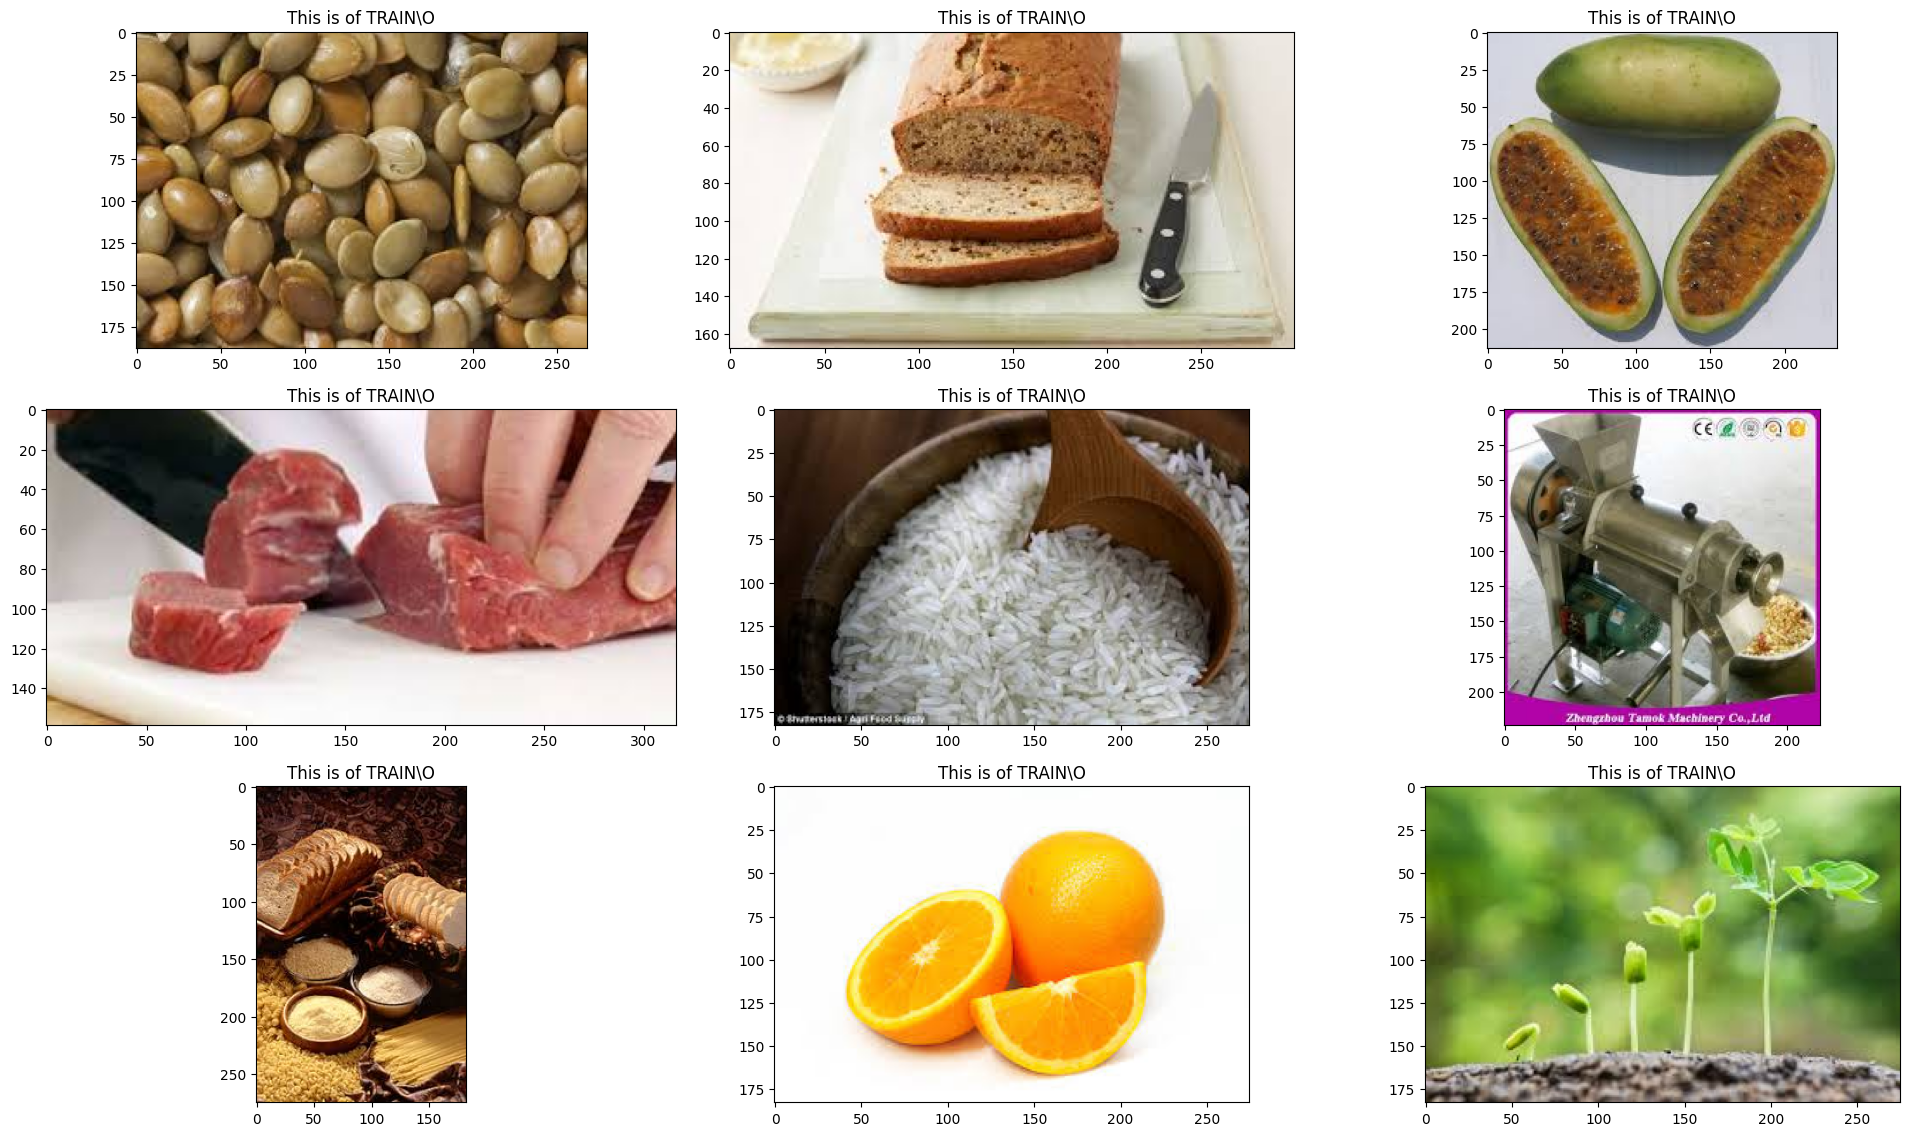

In [11]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(13000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


## CNN - Convolutional Neural Network 

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 362

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./361)

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./361)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 396s 6s/step - accuracy: 0.6636 - loss: 0.6701 - val_accuracy: 0.8655 - val_loss: 0.3598
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.8281 - loss: 0.4184 - val_accuracy: 0.8754 - val_loss: 0.3176
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.8436 - loss: 0.3807 - val_accuracy: 0.8906 - val_loss: 0.2835
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.8583 - loss: 0.3481 - val_accuracy: 0.8643 - val_loss: 0.3298
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.8643 - loss: 0.3395 - val_accuracy: 0.8798 - val_loss: 0.2982
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 420s 7s/step - accuracy: 0.8800 - loss: 0.3068 - val_accuracy: 0.8906 - val_loss: 0.2789
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 279s 4s/step - accuracy: 0.8903 - loss: 0.2826 - val_accuracy: 0.8914 - val_loss: 0.2818
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.8976 - loss: 0.2588 - val_accuracy: 0.8969 - v